# 逻辑回归

## Gradient Descent(梯度下降)

$$
\Theta^1 = \Theta^0 - \alpha\nabla J(\Theta) \quad evaluated\quad at\quad \Theta^0  \\
\begin{align}\notag
\Theta^1 &：下一步位置  \\ \notag
\Theta^0 &：当前位置\\ \notag
\alpha&:步长\\\notag
\nabla J(\Theta) &:当前梯度
\end{align}
$$

### 梯度下降例子

$$
\quad\quad\ \ 函数：J(\theta) = \theta^2 \quad \\
函数微分：J'(\theta)  = 2\theta\\
初始起点：\theta^0 = 1 \quad \ \ \ \\
学习率：\alpha =0.4 \
$$

$$
\begin{align}\notag
\theta^0 & = 1\\ \notag
\theta^1 &= \theta^0 - \alpha*J'(\theta^0)\\\notag
&=1-0.4*2\\\notag
&=0.2\\\notag
\theta^2 &= \theta^1 - \alpha*J'(\theta^1)\\\notag
&=0.2-0.4*0.4\\\notag
&=0.04\\\notag
\theta^3 &= 0.08\\\notag
\theta^4 &= 0.0016\\\notag
\end{align}\notag
$$

###  获取实验数据集

$$f(x)=\frac{1}{1 + e^{- x}}$$

$$f'(x)=\frac{e^{- x}}{\left(1 + e^{- x}\right)^{2}} = f(x)(1-f(x))$$

其中:
$$ℎ_𝜃(x_i) = \theta_0 + \theta_1x_1 + \cdots + \theta_nx_n$$ 
这里定义的代价函数为交叉熵函数:
$$J(\theta) = - \frac{1}{m}\sum 𝑦^{(𝑖)}log (ℎ_𝜃(𝑥^i)) + (1 − 𝑦^𝑖)log (1 − ℎ_𝜃(𝑥^𝑖))$$
其中:
$$h_\theta(x^i)=\frac{1}{1 + e^{- \theta^Tx^i}}$$
求导(推导过程略)：
$$\frac{\partial J(\theta)}{\partial x_j} = \frac{1}{m} \sum (ℎ_𝜃(𝑥^𝑖) − 𝑦^𝑖)𝑥_𝑗$$

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [158]:
def loadDataSet():
    dataMat = []; labelMat = []
    with open('testSet.txt') as fr:
        for line in fr.readlines():
            lineArr = line.strip().split()
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])#X0值设为1是为了计算方便
            labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1/(1+np.exp(-inX))

#这里是上升求极大值点，而不是梯度下降求小值点
def gradAscent(dataMatin, classLabels):
    dataMatrix = np.mat(dataMatin)
    labelMat = np.mat(classLabels).transpose()
    m, n  = np.shape(dataMatrix)
    aplpha = 0.001
    maxCycles = 500
    weight = np.ones((n,1)) #初始值
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weight)
        error = labelMat - h #相当于loss函数
        ##这里省略了1/m，导致的结果是学习速率变快，如果/m那么同样条件下maxCycles次数要扩大才能得到一样的效果
        weight = weight + aplpha * dataMatrix.transpose()*error 
        
    weight = np.array(weight)
    return weight.flatten()

def plotbestfit(dataset, labelvec, weight):
    dataset = np.array(dataset)
    #plt.figure(figsize=(10,10))
    plt.scatter(dataset[:, 1],dataset[:, 2],20,['green' if num==1 else 'red' for num in labelvec])
    
    #print(weight)
    x = np.arange(-3, 3, 0.1)
    y = (-weight[0]- weight[1]*x) / weight[2]
    plt.plot(x, y)
    plt.tick_params(axis='both',colors ='white')
    plt.xlabel('X1',c = 'white')
    plt.ylabel('X2',c = 'white')

# 随机梯度下降，每次仅使用一个或一小集合数据来更新一次
# 当一轮数据被更新完可以以继续重复同样的数据再次更新这样更新n次才能公平地和普通的梯度下降迭代n次对比
# 而普通的梯度下降是所有数据更新迭代n次，
def stocGradAscent0(dataMatrix, classLabels):
    dataMatrix = np.array(dataMatrix)
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)   #initialize to all ones
    #相当于在整个数据集只运行了一次
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

#改进算法1
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    dataMatrix = np.array(dataMatrix)
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 8/(1.0+j+i)+0.0001   #可减少回归系数的波动或高频波动
            randIndex = int(np.random.uniform(0,len(dataIndex)))##可减少回归系数周期性波动
            
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

In [130]:
dataMat,labelMat = loadDataSet()
weight = gradAscent(dataMat, labelMat)

In [145]:
type(weight2)

numpy.ndarray

In [131]:
weight1 = stocGradAscent0(dataMat, labelMat)
weight2 = stocGradAscent1(dataMat, labelMat)

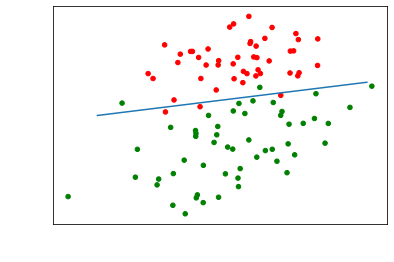

In [133]:
#plotbestfit(dataMat,labelMat, weight)
#plotbestfit(dataMat,labelMat, weight1)
plotbestfit(dataMat,labelMat, weight2)

## 预测病马的死亡率

In [160]:
def classifyVector(inX, weight):
    if isinstance(inX, list):
        inX = np.array(inX)
    prob = sigmoid(sum(inX*weight))
    if prob > 0.5:return 1
    else:return 0

def colicTest():
    trainingSet = []; trainingLabels = []
    with open('horseColicTraining.txt') as frTrain:
        for line in frTrain.readlines():
            currLine = line.strip().split('\t')
            lineArr =[]
            for i in range(21):
                lineArr.append(float(currLine[i]))
            trainingSet.append(lineArr)
            trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(trainingSet, trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    
    #print(type(trainWeights))
    with open('horseColicTest.txt') as frTest:
        for line in frTest.readlines():
            numTestVec += 1.0
            currLine = line.strip().split('\t')
            lineArr =[]
            for i in range(21):
                lineArr.append(float(currLine[i]))
            if int(classifyVector(lineArr, trainWeights))!= int(currLine[21]):
                errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print("the error rate of this test is: %f" % errorRate)
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests))) 

In [161]:
multiTest()

the error rate of this test is: 0.328358
the error rate of this test is: 0.373134
the error rate of this test is: 0.417910
the error rate of this test is: 0.388060
the error rate of this test is: 0.283582
the error rate of this test is: 0.358209
the error rate of this test is: 0.238806
the error rate of this test is: 0.343284
the error rate of this test is: 0.313433
the error rate of this test is: 0.417910
after 10 iterations the average error rate is: 0.346269
